# Climate Warming Applied

We want to use the [data of the german weather service](https://www.dwd.de/DE/leistungen/cdc_portal/cdc_portal.html) to evaluate the concrete change of temperature that can be measured at a given spot since the measures started.

In this case, I choose a station close to me, the station 6217 which can be browsed from [the map](https://cdc.dwd.de/portal/index.html) and for which the historical data can be retrieved e.g. [in http](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/) for the hourly measures.

Under the hypothesis that the temperature is under a warming process that is linear along the years, we apply linear regression (done in the course-book) to calculate the coefficient of the slope of the line approximating the temperature. We make a prediction of a temperature change for in 100 years.

In [6]:
import numpy
import pandas
from pandas import read_csv

We download the data from _Stundenwerte_ (hourly values). The interesting file is the big txt file which needs a slightly special import command.

In [54]:
df = read_csv("/tmp/stundenwerte_TU_06217_20041001_20201231_hist/produkt_tu_stunde_20041001_20201231_06217.txt", sep=';')

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,6217,2004100100,3,12.8,91.0,eor
1,6217,2004100101,10,12.8,91.0,eor
2,6217,2004100102,10,12.4,91.0,eor
3,6217,2004100103,10,12.4,91.0,eor
4,6217,2004100104,10,12.5,90.0,eor
...,...,...,...,...,...,...
142344,6217,2020123119,3,1.8,94.0,eor
142345,6217,2020123120,3,2.0,92.0,eor
142346,6217,2020123121,3,2.4,94.0,eor
142347,6217,2020123122,3,2.7,93.0,eor


<AxesSubplot:>

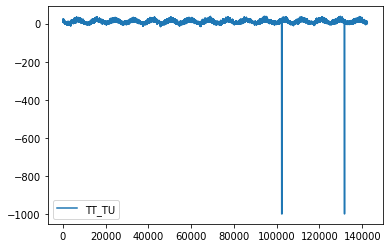

In [57]:
# lets plot them
df.plot(y='TT_TU')

In [50]:
# some values are -999... they should be removed.
t = df[df['TT_TU']>-100]
t

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,6217,2004100100,3,12.8,91.0,eor
1,6217,2004100101,10,12.8,91.0,eor
2,6217,2004100102,10,12.4,91.0,eor
3,6217,2004100103,10,12.4,91.0,eor
4,6217,2004100104,10,12.5,90.0,eor
...,...,...,...,...,...,...
142344,6217,2020123119,3,1.8,94.0,eor
142345,6217,2020123120,3,2.0,92.0,eor
142346,6217,2020123121,3,2.4,94.0,eor
142347,6217,2020123122,3,2.7,93.0,eor


The following plot looks like a reasonable temperature change.

<AxesSubplot:>

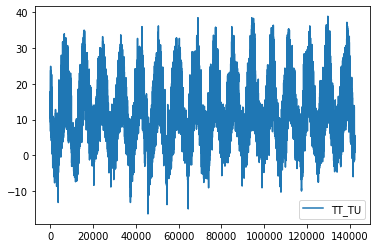

In [52]:
t.plot(y='TT_TU')

In [45]:
sum1 = 0
sum2 = 0
for i in range(142348):
    sum1 += i*df['TT_TU'][i]
    sum2 += i*i
    


In [47]:
sum1/sum2

8.492456803739078e-05

In [48]:
# so in 100 years, it'd be
sum1/sum2*100

0.008492456803739078